# Extra - Interpolate Time Series

In our dataset, in Chapter 2 we noticed that the series for uf 'ES'

In [5]:
import polars as pl 
import numpy as np
import os
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import seaborn as sns
from lets_plot import *
LetsPlot.setup_html()

pl.Config.set_tbl_rows(100)

# Load environment variables from .env file
load_dotenv()
# Retrieve the dataset path from the environment variable
DATASET = os.getenv('DATASET')
df = pl.read_parquet(DATASET)
df.head()

date,epiweek,week,month,year,geocode,uf,casos,regional_geocode,macroregional_geocode,train_1,target_1,train_2,target_2,train_3,target_3,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,pressure_min,pressure_med,pressure_max,rel_humid_min,rel_humid_med,rel_humid_max,thermal_range,rainy_days,population,municipality_latitude,municipality_longitude,cope_forecast_temp_med_1,cope_forecast_temp_med_2,cope_forecast_temp_med_3,cope_forecast_temp_med_4,cope_forecast_temp_med_5,cope_forecast_temp_med_6,cope_forecast_umid_med_1,cope_forecast_umid_med_2,cope_forecast_umid_med_3,cope_forecast_umid_med_4,cope_forecast_umid_med_5,cope_forecast_umid_med_6,cope_forecast_precip_tot_1,cope_forecast_precip_tot_2,cope_forecast_precip_tot_3,cope_forecast_precip_tot_4,cope_forecast_precip_tot_5,cope_forecast_precip_tot_6,outlier
datetime[ms],i64,i64,i8,i64,i64,str,i64,i64,i64,bool,bool,bool,bool,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,bool
2024-03-24 00:00:00,202413,13,3,2024,3164407,"""MG""",11,31007,3115,false,false,false,true,true,false,17.708171,19.869614,22.697743,5.1093,37.4151,98.7575,0.895543,0.896957,0.898257,76.053743,88.506929,96.577586,4.989571,7,6694,-45.757434,-22.165648,22.050562,20.366571,18.466455,16.965692,17.014368,19.07644,78.170423,74.618067,71.385438,69.092275,63.488331,55.082867,0.0000577,0.000023,0.0000137,0.0000093,0.0000039,0.0000058,false
2011-04-10 00:00:00,201115,15,4,2011,4311643,"""RS""",0,43023,4310,true,false,true,false,true,false,16.072614,19.532371,23.481343,0.7252,35.0116,88.2397,0.970029,0.971943,0.973771,72.016971,87.839557,97.476386,7.408729,7,1629,-51.210582,-29.455085,18.610345,15.088647,12.729425,12.960321,13.861047,15.539056,82.055857,81.580089,81.484486,83.042037,80.107142,78.678769,0.0000389,0.0000347,0.00004,0.0000457,0.0000422,0.0000543,false
2017-08-20 00:00:00,201734,34,8,2017,1100320,"""RO""",0,11003,1101,true,false,true,false,true,false,22.051543,26.557943,32.663586,0.0,0.6746,4.0699,0.969529,0.972143,0.974571,42.653114,67.477643,86.2993,10.612043,7,24181,-62.724019,-11.620495,26.582884,26.592879,26.045666,25.704721,25.448929,25.239912,56.312838,70.992277,81.912014,86.195941,87.800162,88.326952,0.000012,0.0000408,0.0000728,0.0000913,0.0001107,0.0001208,false
2018-09-30 00:00:00,201840,40,9,2018,5220686,"""GO""",0,52007,5207,true,false,true,false,true,false,24.906614,30.786671,36.2189,0.0563,0.4265,1.2139,0.933343,0.935429,0.937857,24.185614,36.576729,54.881514,11.312286,5,6832,-46.573684,-14.439764,25.857092,25.670502,24.922878,24.038577,23.613317,23.46024,37.567736,53.615715,64.910646,73.954452,76.832381,79.157081,0.000007,0.0000442,0.0000613,0.0000849,0.0001033,0.0000987,false
2013-04-14 00:00:00,201316,16,4,2013,4317004,"""RS""",0,43021,4309,true,false,true,false,true,false,9.902429,15.2402,21.0521,0.0,0.0042,0.0247,0.979243,0.980557,0.981986,55.6879,75.062086,89.776071,11.149671,0,8455,-53.081542,-30.74096,17.836847,14.39306,12.298151,12.539484,13.627588,15.021448,81.190323,82.218586,83.207557,82.729326,80.529062,78.770302,0.0000518,0.0000432,0.000044,0.0000418,0.000047,0.0000582,false


In [10]:
es = df.filter(pl.col('uf') == 'ES')

es = es.with_columns(
    np.log1p(pl.col('casos')).alias('log_casos')
)



<Axes: xlabel='date', ylabel='log_casos'>

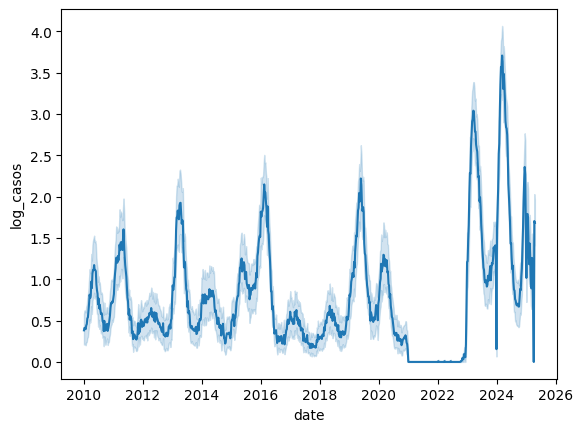

In [11]:
sns.lineplot(data=es,x='date',y='log_casos')

In [18]:
es = es.group_by(['date','week','epiweek','year']).agg(
    pl.col('casos').sum().alias('casos')
)

es = es.with_columns(
    np.log1p(pl.col('casos')).alias('log_casos')
)

<Axes: xlabel='date', ylabel='log_casos'>

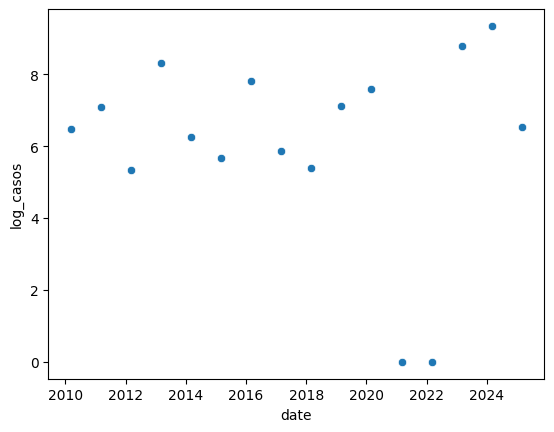

In [19]:
# sns.scatterplot(data=es.filter(pl.col('week') == 10),x='date',y='log_casos')